In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats

#Khi matplotlib render ra đồ thị, hiển thị ngay sau block code
%matplotlib inline 

sns.set()

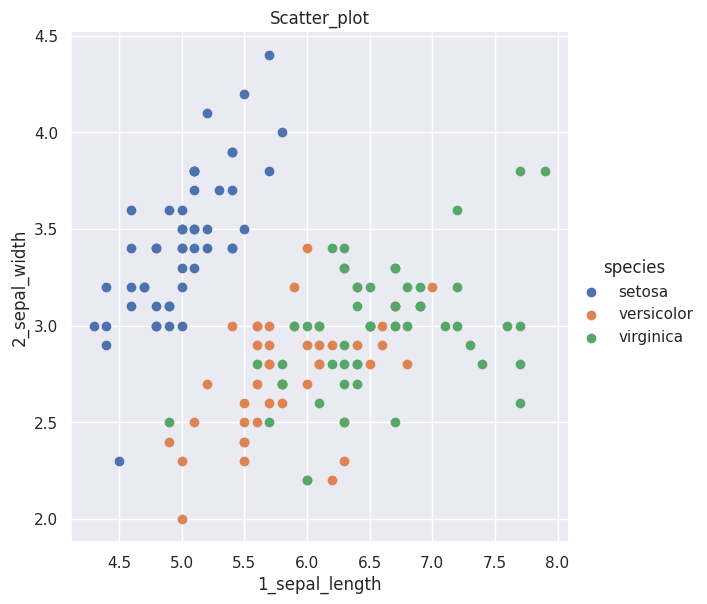

In [8]:
#Load the data set
iris = sns.load_dataset('iris')
#Change the name of each field in dataset
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width','petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris,
              hue="species",
              height = 6, aspect=1).map(plt.scatter, "1_sepal_length", "2_sepal_width").add_legend()
plt.title('Scatter_plot')
df1 = iris[['1_sepal_length', '2_sepal_width', 'species']]



# Gaussian NB with Numpy and Pandas

In [9]:
def predict_NB_gaussian_class(X, mu_list, std_list, pi_list):
  scores_list = []
  classes = len(mu_list)
  
  for p in range(classes):
    score = norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0]) * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1]) * pi_list[p]
    scores_list.append(score)
  return np.argmax(scores_list)

## Giải thích
- mu_list: danh sách các giá trị trung bình mean của từng đặc trung trong từng lớp. Phần tử mu_list[p][0][j] là giá trị trung bình của trường thứ j với các điểm dữ liệu thuộc lớp p
- std_list: danh sách độ lệch chuẩn của từng đặc trưng trong từng lớp. Phần tử std_list[p][0][j] là độ lệch chuẩn của trường thứ j với các điểm dữ liệu thuộc lớp p
- pi_list: xác suất của lớp thứ pi trong tất cả các lớp



In [11]:
def predict_Bayes_class(X, mu_list, sigma_list):
  scores_list = []
  classes = len(mu_list)

  for p in range(classes):
    score = scipy.stats.multivariate_normal.pdf(X, mean = mu_list[p], cov = sigma_list[p])
    scores_list.append(score)

  return np.argmax(scores_list)

## Giải thích
Hàm trên là công thức của Gaussian Clasifier tổng quát
- mu_list[p]: vector trung bình của class p
- sigma_list[p]: ma trận hiệp phương sai của class p
công thức trên dựa trên phân phối chuẩn nhiều chiều và không giả định độc lập giữa các feature với nhau. 
=> Phù hợp khi feature có tương quan với nhau

In [16]:
mu_list = np.split(df1.groupby('species').mean().values, [1, 2])
std_list = np.split(df1.groupby('species').mean().values, [1, 2], axis = 0)
pi_list = df1.iloc[:, 2].value_counts().values / len(df1)

print(len(mu_list))
print(mu_list[0].shape)
print(mu_list)

3
(1, 2)
[array([[5.006, 3.428]]), array([[5.936, 2.77 ]]), array([[6.588, 2.974]])]


Từ output trên, ta giải thích được tại sao ở hàm predict_Bayes_class, mu_list (giá trị trung bình của từng trường theo từng lớp) và std_list (độ lệch chuẩn của từng trường theo từng lớp) lại được biểu diễn 3 chiều
(Do thư viện numpy xử lý)

In [34]:
X = np.array(df1.iloc[:, 0:2])
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

y_pred = np.zeros(X.shape[0])
for i in range(X.shape[0]):
     y_pred[i] = predict_NB_gaussian_class(X[i, :], mu_list, std_list, pi_list)

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_pred, y_labels)

/tmp/ipykernel_13109/1029700112.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()


0.4866666666666667

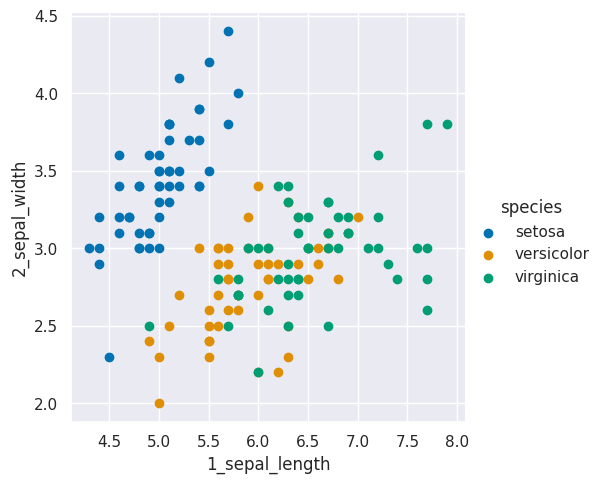

In [18]:
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

color_list = ['Blues', 'Greens', 'Reds']
my_norm = colors.Normalize(vmin=1, vmax=1)

g = sns.FacetGrid(iris, hue="species", height=5, aspect=1, palette = 'colorblind').map(plt.scatter, "1_sepal_length", "2_sepal_width",) .add_legend()
my_ax = g.ax

In [ ]:
zz = np.array([predict_NB_gaussian_class(np.array([xx, yy]).reshape(-1, 1), mu_list=mu_list, std_list=std_list, pi_list=pi_list) for xx, yy in zip(np.ravel(X), np.ravel(Y))])

Z = zz.reshape(X.shape)

my_ax.contourf(X, Y, Z, 2, alpha= .1, colors = ['blue', 'green', 'red'])
my_ax.contour(X, Y, Z, 2, alpha= .1, colors = ['blue', 'green', 'red'])

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

<Axes: title={'center': 'Gaussian Naive Bayes decision boundaries'}, xlabel='Sepal length', ylabel='Sepal width'>

# Sử dụng thư viện sklearn

In [32]:
from sklearn.naive_bayes import GaussianNB
#Setup X and y data
X_data = df1.iloc[:, 0:2]
y_labels = df1.iloc[:, 2].replace({'setosa':0, 'versicolor':1, 'virginica':2}).copy()

model = GaussianNB(priors=None)
model.fit(X_data, y_labels)
y_predict = model.predict(X_data)
print(accuracy_score(y_labels, y_predict))

0.78


/tmp/ipykernel_13109/1730865242.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_labels = df1.iloc[:, 2].replace({'setosa':0, 'versicolor':1, 'virginica':2}).copy()


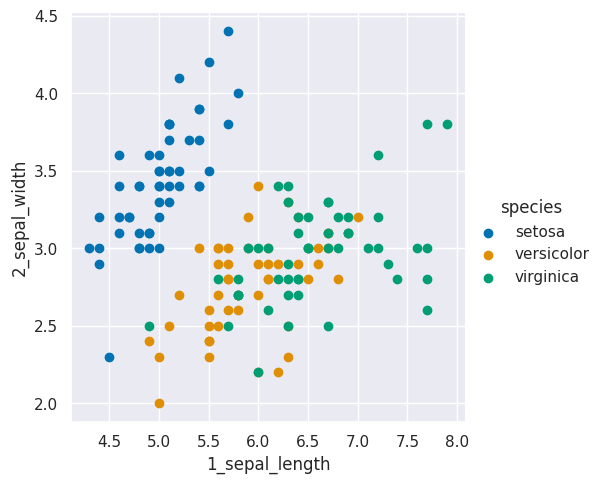

In [28]:
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

color_list = ['Blues', 'Greens', 'Reds']
my_norm = colors.Normalize(vmin=1, vmax=1)

g = sns.FacetGrid(iris, hue="species", height=5, aspect=1, palette = 'colorblind').map(plt.scatter, "1_sepal_length", "2_sepal_width",) .add_legend()
my_ax = g.ax

In [29]:
zz = np.array([predict_NB_gaussian_class(np.array([xx, yy]).reshape(-1, 1), mu_list=mu_list, std_list=std_list, pi_list=pi_list) for xx, yy in zip(np.ravel(X), np.ravel(Y))])

Z = zz.reshape(X.shape)

my_ax.contourf(X, Y, Z, 2, alpha= .1, colors = ['blue', 'green', 'red'])
my_ax.contour(X, Y, Z, 2, alpha= .1, colors = ['blue', 'green', 'red'])

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()